In [2]:
import csv
import numpy
import matplotlib.pyplot as plt 

In [4]:
def read_data(file_path, mult_simple_hits, mult_simple_misses, mult_block_hits, mult_block_misses, mult_swap_hits, mult_swap_misses):
    with open(file_path, newline='') as file:
        reader = csv.reader(file, delimiter=',', quotechar='|')
        
        # simple mult
        row = next(reader)
        mult_simple_hits.append(int(row[0]))
        mult_simple_misses.append(int(row[1]))
        
        # block mult
        row = next(reader)
        mult_block_hits.append(int(row[0]))
        mult_block_misses.append(int(row[1]))
        
        # swap mult
        row = next(reader)
        mult_swap_hits.append(int(row[0]))
        mult_swap_misses.append(int(row[1]))

def display_plot_from_file(filename, y_label):
    (matrix_size, mult_simple, mult_block, mult_swap) = read_data(filename)

    plt.plot(matrix_size, mult_simple, 'r', matrix_size, mult_block, 'g', matrix_size, mult_swap, 'b')
    plt.xlabel("Matrix Size")
    plt.ylabel(y_label)
    plt.show()
    
def create_filename_from_matrix_size(matrix_size):
    return "L3 Data/%d_float_cache_misses_L3_new_code.csv" % (matrix_size)

In [5]:
matrix_sizes = [1023, 1024, 1025, 1040, 1041, 1050, 1100]

mult_simple_hits = list()
mult_simple_misses = list()
mult_block_hits = list()
mult_block_misses = list()
mult_swap_hits = list()
mult_swap_misses = list()

for matrix_size in matrix_sizes:
    file_name = create_filename_from_matrix_size(matrix_size)
    read_data(file_name, mult_simple_hits, mult_simple_misses, mult_block_hits, mult_block_misses, mult_swap_hits,mult_swap_misses)

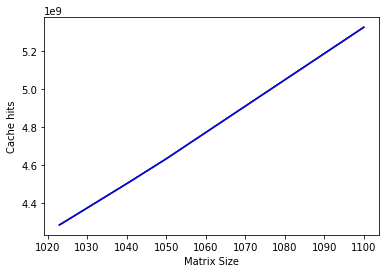

In [6]:
plt.plot(matrix_sizes, mult_simple_hits, 'r', matrix_sizes, mult_block_hits, 'g', matrix_sizes, mult_swap_hits, 'b')
plt.xlabel("Matrix Size")
plt.ylabel("Cache hits")
plt.show()

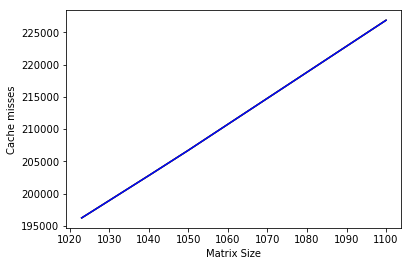

In [7]:
plt.plot(matrix_sizes, mult_simple_misses, 'r', matrix_sizes, mult_block_misses, 'g', matrix_sizes, mult_swap_misses, 'b')
plt.xlabel("Matrix Size")
plt.ylabel("Cache misses")
plt.show()

Результаты получены для сэмулированного кэша третьего уровня моего ПК.
Параметры:
 - cache size = 8Mb
 - associativity = 16
 - cache line lenght = 64 bytes
 
Судя по результатам, размера кэша третьего уровня достаточно, чтобы данные никогда не конфликтовали при записи в кэш. Независимо от метода перемножения матриц результаты получились одинаковые.